In [41]:
import numpy as np
import pandas as pd
import math as m
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



In [42]:
train_set = pd.read_csv("trainEmployeeData.csv")
test_set = pd.read_csv("testEmployeeData.csv")
train_set.head()

0       Y
1       Y
2       Y
3       Y
4       Y
5       Y
6       Y
7       Y
8       Y
9       Y
10      Y
11      Y
12      Y
13      Y
14      Y
15      Y
16      Y
17      Y
18      Y
19      Y
20      Y
21      Y
22      Y
23      Y
24      Y
25      Y
26      Y
27      Y
28      Y
29      Y
       ..
1146    Y
1147    Y
1148    Y
1149    Y
1150    Y
1151    Y
1152    Y
1153    Y
1154    Y
1155    Y
1156    Y
1157    Y
1158    Y
1159    Y
1160    Y
1161    Y
1162    Y
1163    Y
1164    Y
1165    Y
1166    Y
1167    Y
1168    Y
1169    Y
1170    Y
1171    Y
1172    Y
1173    Y
1174    Y
1175    Y
Name: Over18, Length: 1176, dtype: object


,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,388,42,No,Travel_Rarely,201,Research & Development,1,4,Life Sciences,1,...,2,80,1,8,5,3,5,2,1,2
1,262,32,No,Travel_Rarely,128,Research & Development,2,1,Technical Degree,1,...,4,80,0,9,5,3,6,2,0,4
2,904,48,No,Travel_Rarely,715,Research & Development,1,3,Life Sciences,1,...,3,80,0,25,3,4,1,0,0,0
3,87,51,No,Travel_Rarely,432,Research & Development,9,4,Life Sciences,1,...,2,80,2,10,4,3,4,2,0,3
4,1324,29,No,Travel_Rarely,726,Research & Development,29,1,Life Sciences,1,...,4,80,2,11,3,3,7,0,1,6


In [43]:
# Replace categoricals and boolean variables in data frame
def transform_df(df):
    df =df.drop(df.columns[0],axis=1) # drop panda indexing column
    
    #df= df.drop('Over18',axis=1)
    
    # One Hot encoding for categorical variables
    categoricals = ['BusinessTravel','Department', 'EducationField','JobRole','MaritalStatus']
    for item in categoricals:
        dummy = pd.get_dummies(df[item], prefix=item)
        df = df.join(dummy.loc[:, :])
        df = df.drop(item, axis=1)
        
    #Transform boolean values into numbers
    df['Attrition'] = df['Attrition'].map(lambda x: 0 if x == 'No' else 1)
    df['OverTime'] = df['OverTime'].map(lambda x: 0 if x == 'No' else 1)
    df['Gender'] = df['Gender'].map(lambda x: 0 if x== 'Female' else 1)
    df['Over18'] = df['Over18'].map(lambda x: 0 if x=='N' else 1)
    
    
    return df

In [44]:
train_set = transform_df(train_set)
test_set = transform_df(test_set)

# form x and y for train and test
y_train = train_set['Attrition']
x_train = train_set.drop(['Attrition'], axis=1)
y_test = test_set['Attrition']
x_test = test_set.drop(['Attrition'], axis=1)

print(x_train.dtypes)

Age                                  int64
DailyRate                            int64
DistanceFromHome                     int64
Education                            int64
EmployeeCount                        int64
EmployeeNumber                       int64
EnvironmentSatisfaction              int64
Gender                               int64
HourlyRate                           int64
JobInvolvement                       int64
JobLevel                             int64
JobSatisfaction                      int64
MonthlyIncome                        int64
MonthlyRate                          int64
NumCompaniesWorked                   int64
Over18                               int64
OverTime                             int64
PercentSalaryHike                    int64
PerformanceRating                    int64
RelationshipSatisfaction             int64
StandardHours                        int64
StockOptionLevel                     int64
TotalWorkingYears                    int64
TrainingTim

In [57]:
# Logistic Regressison
model = LogisticRegression(penalty='l2', C=1,fit_intercept=True)
model.fit(x_train, y_train)
print("Training Accuracy: ", model.score(x_train, y_train))
print("Test Accuracy: ", model.score(x_test,y_test))


('Training Accuracy: ', 0.88945578231292521)
('Test Accuracy: ', 0.86394557823129248)


('Age', -0.49070233571186456)
('DailyRate', -0.37861319298640711)
('DistanceFromHome', -0.37480743051886278)
('Education', -0.33141913001630408)
('EmployeeCount', -0.28245235691898896)
('EmployeeNumber', -0.25053304083374367)
('EnvironmentSatisfaction', -0.23193942214096103)
('Gender', -0.22956815646655881)
('HourlyRate', -0.20306469146054507)
('JobInvolvement', -0.18537062787707648)
('JobLevel', -0.16827673411882349)
('JobSatisfaction', -0.16300451225735682)
('MonthlyIncome', -0.1629790764009463)
('MonthlyRate', -0.15971853737722788)
('NumCompaniesWorked', -0.15190098550945769)
('Over18', -0.14679203896356652)
('OverTime', -0.14554045879902711)
('PercentSalaryHike', -0.14372708645131144)
('PerformanceRating', -0.12756341901017793)
('RelationshipSatisfaction', -0.061761247420799026)
('StandardHours', -0.042481061344005491)
('StockOptionLevel', -0.04000767385498092)
('TotalWorkingYears', -0.027417692554096946)
('TrainingTimesLastYear', -0.027412829662779421)
('WorkLifeBalance', -0.02001

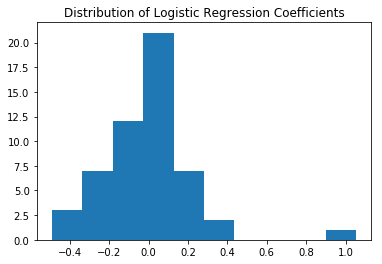

In [59]:
#display Logistic Regression coefficients
coef = [item for sublist in model.coef_ for item in sublist] #flatten model.coef_
coef = sorted(coef)
for idx, val in enumerate(coef):
    print(x_train.columns[idx],val)
plt.hist(coef)
plt.title("Distribution of Logistic Regression Coefficients")
plt.show()